In [3]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font',family= 'MalGun Gothic')
mpl.rc('axes',unicode_minus = False)

# scaling (데이터 전처리 과정)

* minmax scaler -> 0~1 사이
* standard scaler -> 평균이 0이고 분산이 1인 정규화
* robust scaler -> 평균과 분산 대신 중앙값과 사분위수 사용  -> 이상치에 덜 민감하다.(사분위수 때문에)
* normalizer -> 특성벡터의 유클리디안 거리가 1             -> 길이가 상관없고 방향이 중요할 때 사용

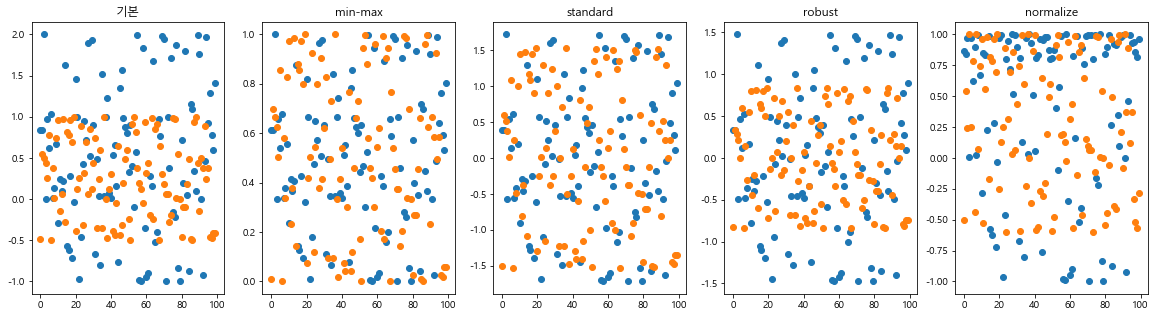

In [37]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

# 데이터 불러오기
X,y = make_moons()

# min_max_scaler 사용
min_max = MinMaxScaler()
X_min_max = min_max.fit_transform(X)

# Stndard scaler 사용
standard = StandardScaler()
X_standard = standard.fit_transform(X)

# Robust scaler 사용
robust = RobustScaler()
X_robust = robust.fit_transform(X)

# Normalize scaler 사용
normalize = Normalizer()
X_normalize = normalize.fit_transform(X)


# # 시각화하기
plt.figure(figsize=(20,5))
plt.subplot(151)
plt.plot(X,'o') ; plt.title('기본')
plt.subplot(152)
plt.plot(X_min_max,'o') ; plt.title('min-max')
plt.subplot(153)
plt.plot(X_standard,'o') ; plt.title('standard')
plt.subplot(154)
plt.plot(X_robust,'o') ; plt.title('robust')
plt.subplot(155)
plt.plot(X_normalize,'o') ; plt.title('normalize')
plt.show()
#########################
# 밑의 그래프를 보고 각 스케일링의 결과를 확인할 수 있다.

In [45]:
# cancer 데이터를 이용하여 스케일링 작업해보기 -> 모델은 svc 사용
from collections import OrderedDict # 객체 순서를 정해준다, 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 데이터 불러오기
cancer = load_breast_cancer()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

# 객체 생성하고 순서 정하기
scalings = OrderedDict()
scalings['None'] = None
scalings['min_max'] = MinMaxScaler()
scalings['standard'] = StandardScaler()
scalings['robust'] = RobustScaler()
scalings['normalize'] = Normalizer()

for scale in scalings:
    
    if scale is 'None':
        pass
    else:        
        # 정해진 순서 객체 불러오기
        scaling = scalings[scale]
    
        # 스케일링 작업하기
        X_train_trans = scaling.fit_transform(X_train)
        X_test_trans = scaling.transform(X_test)
    
    # 모델 생성 및 학습하기
    svm = SVC(gamma='auto').fit(X_train_trans,y_train)
    
    # 모델 예측하기
    pred = svm.predict(X_test_trans)
    
    # 모델 정확도 평가하기 
    print('{}스케일링 후 테스트 정확도 : {:.3f}'.format(scale,accuracy_score(y_test,pred)))
##########################
# OrderedDict() 함수를 통해 객체들의 순서를 저장할 수 있고, 순서대로 실행해보아야 할 때 유용하다.
# for문에서 if else문을 사용하여 스케일링을 하지 않았을 경우도 포함시킨다.
# 결과를 확인하면 robust 스케일링 -> 중앙값과 사분위값을 사용해 스케일링을 했을 때 정확도가 높게 나오는 것을 확인할 수 있다.

None스케일링 후 테스트 정확도 : 0.629
min_max스케일링 후 테스트 정확도 : 0.951
standard스케일링 후 테스트 정확도 : 0.965
robust스케일링 후 테스트 정확도 : 0.972
normalize스케일링 후 테스트 정확도 : 0.629


# pca (주성분 분석)

* 차원축소 기법 중 하나이다.
* 특성을 추출하거나 시각화하거나 데이터를 압축하기 위해 사용한다.
* 분산이 최대한 유지되는 쪽으로 차원을 축소시킨다.

* pca는 행렬 분해 기법을 이용하는데 정방행렬만을 고유벡터로 분해할 수 있다.
* SVD 의 경우 행렬 분해 기법을 이용하는데 정방행렬 뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다.

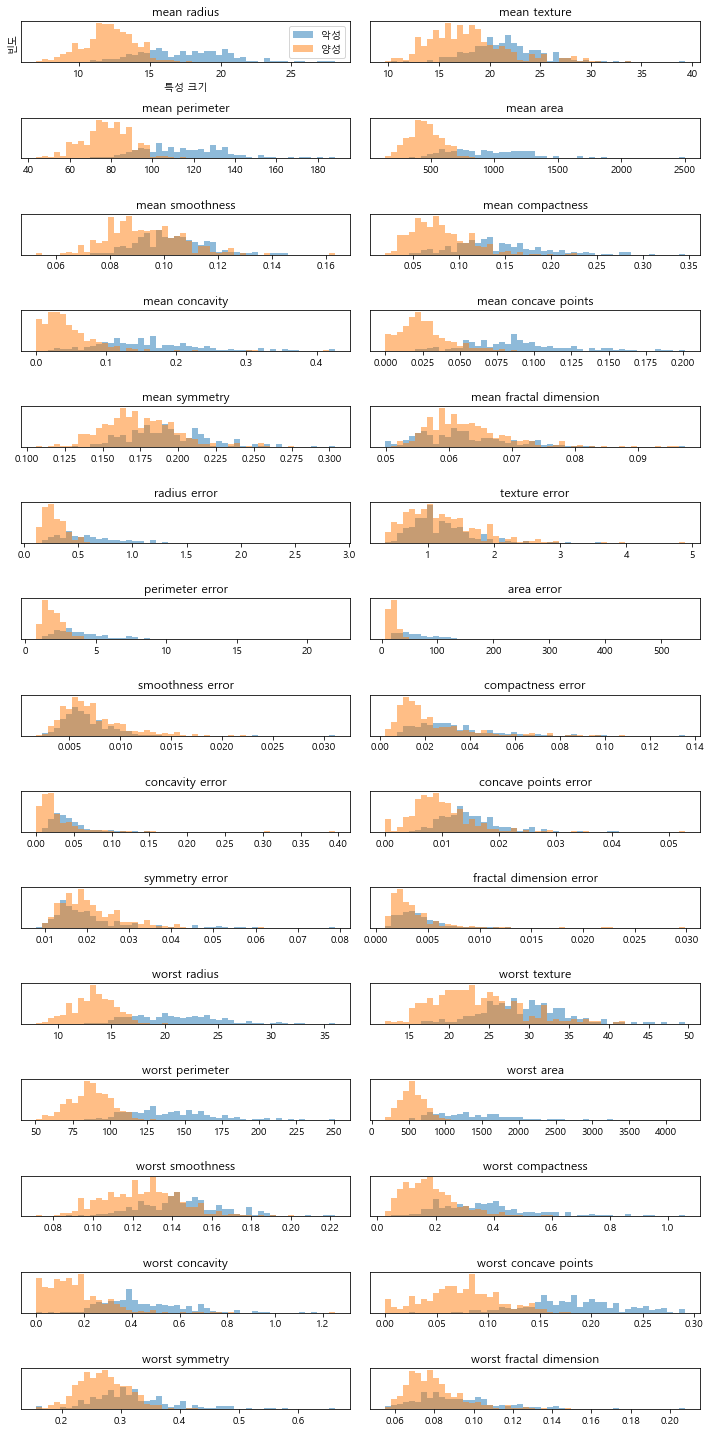

In [56]:
# pca를 적용해 cancer데이터 시각화하기

cancer = load_breast_cancer()

# 양성과 악성 두 클래스에 대한 각 특성의 히스토그램 그려보기

# 그래프 설정
fig,axes = plt.subplots(15,2,figsize=(10,20)) # 15행 2열 그래프 만들고 그래프 크기 설정
negative = cancer.data[cancer.target==0]
positive = cancer.data[cancer.target==1]

ax = axes.ravel() # 축의 배열을 일차원으로 변경

for i in range(30): # 특성이 30개
    _,bins = np.histogram(cancer.data[:,i],bins=50) # bins에 각 특성의 구간들을 저장한다.
    ax[i].hist(negative[:,i],bins=bins, alpha = 0.5) # 히스토그램 그리기
    ax[i].hist(positive[:,i],bins=bins,alpha=0.5)
    ax[i].set_title(cancer.feature_names[i]) # 제목을 각 특성의 이름으로 설정
    ax[i].set_yticks(()) # 눈금표기 없음
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성','양성'],loc='best')
fig.tight_layout() # 여백에 관련된 서브플롯 파라미터를 조정한다.

####################################
# 각 클래스에 대한 각 특성의 히스토그램을 확인해보면, 어떤 특성이 각 클래스를 잘 구분하고 있는지 확인할 수 있다.
# 단, 이 그래프로는 특서와 클래스간의 상호작용, 상관관계를 알 수는 없다.
# mean radius, mean perimeter, mean concave points 등등이 각 클래스를 잘 구분하는 것으로 보인다.

In [57]:
# pca 사용하기 --> pca는 스케일에 영향을 많이 받으므로 스케일링 작업을 해주어야 한다.
# standard scaler 사용하기
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터
cancer = load_breast_cancer()

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

# 두개의 주성분만 유지시키기
pca = PCA(n_components=2) # n_components를 이용해 주성분의 개수를 설정한다.

# pca모델 적용 및 변환
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 

# 축소되고 난 후의 데이터 크기 확인하기
print('원본 데이터 크기',X_scaled.shape)
print('축소 데이터 크기',X_pca.shape)

#############################3
# pca를 사용해 30개의 특성에서 2개의 특성으로 차원이 줄어듦을 확인할 수 있다.
# pca는 단순히 상관관계만을 고려하기 때문에 회전축을 해석하기가 어렵다.

원본 데이터 크기 (569, 30)
축소 데이터 크기 (569, 2)


<Figure size 1440x720 with 0 Axes>

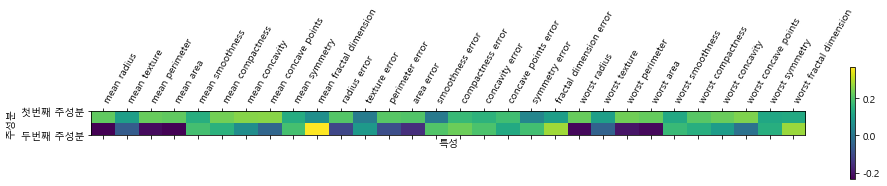

In [62]:
# 주성분과 특성간의 상관관계를 히트맵으로 파악하기
plt.figure(figsize=(20,10))

plt.matshow(pca.components_,cmap='viridis') # 히트맵 그리기
plt.yticks([0,1],['첫번째 주성분','두번째 주성분']) # y값들의 이름 설정
plt.colorbar() # 오른쪽에 컬러바 생성
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60, ha = 'left') # 이름을 회전시키기
plt.xlabel('특성')
plt.ylabel('주성분')
plt.show()

# 얼굴 이미지를 pca를 사용하여 특성추출하기

In [66]:
from sklearn.datasets import fetch_lfw_people

# 데이터 생성하기
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print('하나의 이미지의 크기 :',image_shape)

#############################
# 사진 한장이 87 * 65 픽셀로 이루어져 있는것을 확인할 수 있다.

하나의 이미지의 크기 : (87, 65)


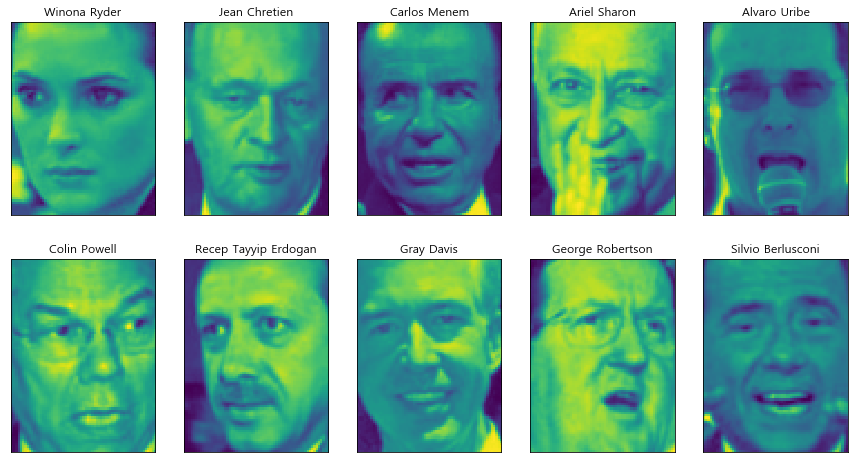

In [77]:
# 이미지 시각화하기

fig, axes = plt.subplots(2,5,figsize=(15,8),  # 옵션 지정
                         subplot_kw = {'xticks':(),'yticks':()}) # x축,y축 눈금 없이 설정

# 데이터의 타겟값과 이미지값, 그리고 서브플롯의 위치를 행벡터로 변경시킨후 하나로 묶는다.
for target, image, ax in zip(people.target,people.images, axes.ravel()):
    ax.imshow(image) # 이미지 그리기
    ax.set_title(people.target_names[target]) # target에 해당되는 이름 출력

* knn을 이용하여 얼굴 분류해보기

In [98]:
from sklearn.neighbors import KNeighborsClassifier

mask = np.zeros(people.target.shape,dtype=bool) # people의 target의 크기만큼 0의 배열 생성하고 타입을 bool형으로 지정

# mask를 이용해 50개의 이미지만 출력
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1 # 50개의 각 인덱스를 mask에 대입해 1을 넣는다.

# 50개 이미지 출력
X_people = people.data[mask]
y_people = people.target[mask]

# 이미지의 픽셀값을 0~1 스케일로 조정
X_people = X_people/255

# 데이터 나누기 -> y_people을 기준으로 계층적 추출을 한다.
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify = y_people, random_state = 0)

# 이웃이 1개인 knn 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

# 예측하기
pred = knn.predict(X_test)
print(pd.Series(people.target_names[pred]).value_counts()) # 예측값들을 target의 인덱스에 넣어 이름을 출력하고, 개수를 구한다.

# 평가하기
print('테스트 점수 : {:.3f}'.format(knn.score(X_test,y_test)))

############################################
# 그냥 people.target_names[pred]).value_counts() 만 사용하면 naraay 타입때문에 오류가 발생하게 된다.
# 이때 pd.Series를 이용해 타입을 바꿔주면 value_counts()가 실행이 된다.
# 테스트 점수를 보았을 때 0,233정도로 분류를 잘하지 못하는 것 같다.

David Beckham        27
John Ashcroft        24
Junichiro Koizumi    23
George W Bush        19
Silvio Berlusconi    19
                     ..
Nestor Kirchner       2
Angelina Jolie        2
Jiang Zemin           1
Hans Blix             1
Jennifer Aniston      1
Length: 61, dtype: int64
테스트 점수 : 0.233


* pca를 이용해 100개의 주성분 추출하기


In [104]:
# pca모델 생성 및 학습시키고 변환하기
pca = PCA(n_components=100, whiten = True , random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('원본 크기 : ',X_train.shape)
print('pca 후  크기 : ',X_train_pca.shape) # 특성이 100개로 줄어든것을 확인할 수 있다.

# knn모델 적용해보기
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca,y_train)

# 평가하기
print('테스트 점수 : {:.3f}'.format(knn.score(X_test_pca,y_test)))

##################################
# pca를 사용하지 않고 knn모델을 사용했을 때는 태스트 점수가 0.233이 나왔는데, pca를 사용하여 knn 모델을 사용했을 때는 0.312가 나왔다.
# 이를 통해 pca를 이용해 특성을 추출하였을 때 분류기의 성능이 조금 더 좋아진다는 것을 확인할 수 있다.

원본 크기 :  (1547, 5655)
pca 후  크기 :  (1547, 100)
테스트 점수 : 0.312


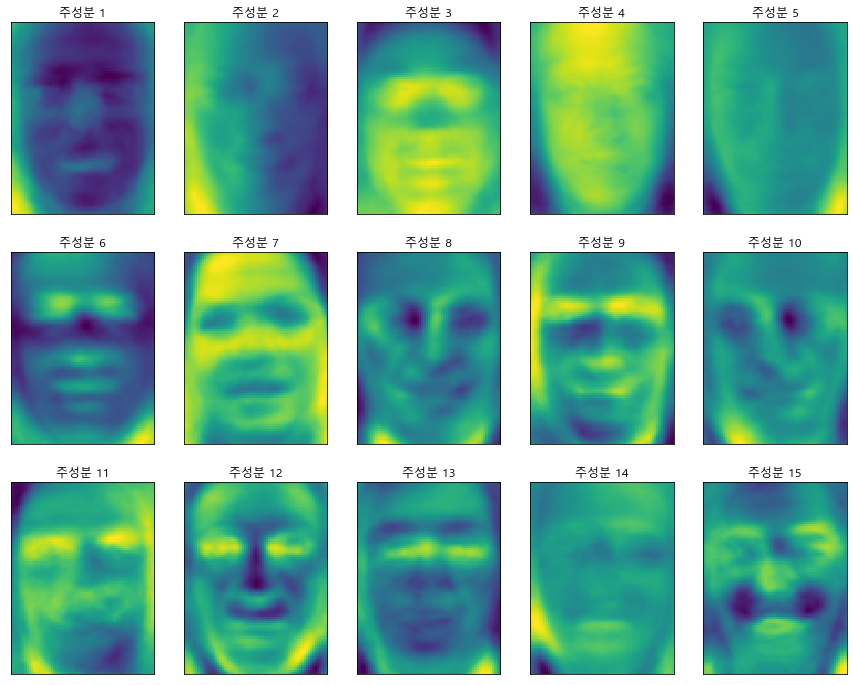

In [123]:
# pca.components_ 를 이용해 각 특성마다의 주성분 분석 확인해보기

fig, axes = plt.subplots(3,5,figsize=(15,12),
                        subplot_kw = {'xticks':(),'yticks':()}) # 그래프 옵션 설정
                        
for i,(component, ax) in enumerate(zip(pca.components_,axes.ravel())): 
    ax.imshow(component.reshape(image_shape), cmap = 'viridis') # component를 87 * 65 배열로 바꾼다.
    ax.set_title('주성분 {}'.format((i+1)))
    
##################################
# enumerate 함수는 순서를 같이 전달해주는 함수이다.
# 예를 들어 enumerate([1,2,3])을 실행하면 (0,1) , (1,2) , (2,3) 같이 나온다.

# 밑의 주성분 그림을 보고 이미지의 특징을 조금 확인해볼 수 있다.
# 주성분 1의 경우 명암의 차이를 나타내고 있고, 주성분 2는 왼쪽 오른쪽의 밝기 차이를 나타내고 있는 것을 확인할 수 있다.

# NMF -> 비음수 행렬 분해

* pca와의 차이점
* pca는 분산이 가장 큰것을 기준으로 특성을 추출하였다면, NMF는 음수가 아닌 성분과 계수 값을 찾는다.
* 음수가 아닌 특성을 가진 데이터에 사용한다.
* 섞여 있는 데이터에서 원본 성분을 구분할 수 있다.

* 합성된 신호에서 원본 신호 복원해보기

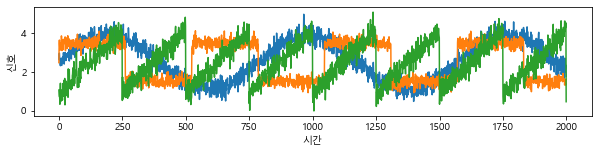

In [126]:
# mglearn에 저장되어 있는 데이터 불러오기
S = mglearn.datasets.make_signals()

# 그래프로 그리기
plt.figure(figsize=(10,2))
plt.plot(S,'-')
plt.xlabel('시간')
plt.ylabel('신호')
plt.show()

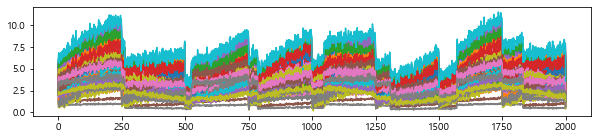

In [134]:
# 원본데이터를 사용해 측정 데이터를 만들기
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S,A.T) # S 행렬과 A전치 행렬을 내적하기

# 시각화 하기
plt.figure(figsize=(10,2))
plt.plot(X,'-')
plt.show()

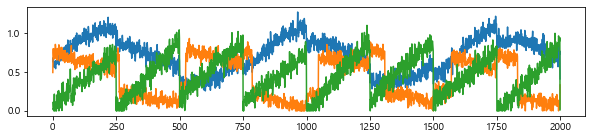

In [136]:
# NMF를 사용해서 신호 복원해보기
from sklearn.decomposition import NMF

# 모델 생성 및 학습,변환
nmf = NMF(n_components=3, random_state=42)
S_trans = nmf.fit_transform(X)

# 시각화 하기
plt.figure(figsize=(10,2))
plt.plot(S_trans,'-')
plt.show()

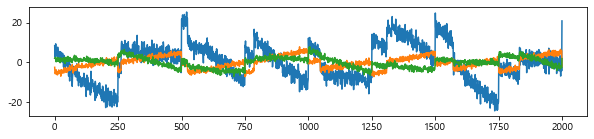

In [137]:
# pca를 사용해서 신호 복원해보기

# 모델 생성 및 학습,변환
pca = PCA(n_components=3, random_state=42)
S_trans1 = pca.fit_transform(X)

# 시각화 하기
plt.figure(figsize=(10,2))
plt.plot(S_trans1,'-')
plt.show()

In [ ]:
# 2개의 결과를 확인해보면 pca보다 nmf를 사용했을 때 원본 신호를 잘 복원하고 있음을 확인할 수 있다.
# 단, nmf로 생성한 성분을 순서가 없음을 인지하고 있어야 한다.

# t-SNE

* 매니폴드 학습 알고리즘 중에 하나이다.
* 훈련 데이터를 시각화하기 위해 주로 쓰이고, 새로운 데이터인 테스트 데이터에는 적용하지 못한다.
* 데이터 포인트 사이의 거리를 잘 보존하는 2차원 표현을 찾는것이 목적이다.

* mnist 데이터를 활용하여 t-sne 적용해보기

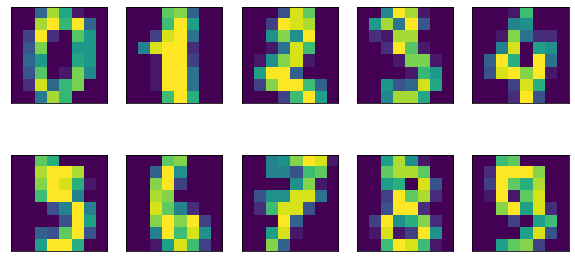

In [138]:
from sklearn.datasets import load_digits

# 데이터 불러오기
digit = load_digits()

# 시각화 하기
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digit.images):
    ax.imshow(img)

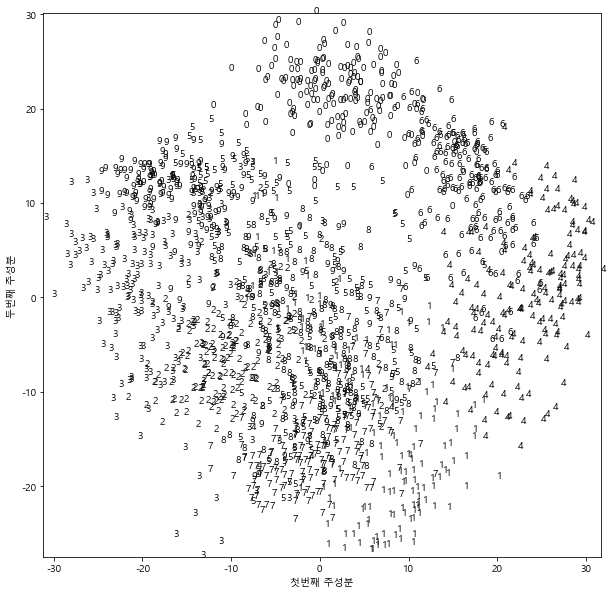

In [145]:
# pca를 사용해 2차원으로 시각화 해보기

# pca 모델 생성 및 학습,변환
pca = PCA(n_components=2) # 주성분 2개로 축소
digit_pca = pca.fit_transform(digit.data)

# 시각화 하기 -> 특성2개로 축소했을 때 첫번째 주성분이 x축, 두번째 주성분이 y축으로 가게 만든다.
plt.figure(figsize=(10,10))
plt.xlim(digit_pca[:,0].min(),digit_pca[:,0].max()) # x축의 범위를 첫번째 주성분의 최소 최댓값으로 지정
plt.ylim(digit_pca[:,1].min(),digit_pca[:,1].max()) # y축의 범위를 두번째 주성분의 최소 최댓값으로 지정

# digit.data의 개수만큼 반복하면서 산점도 그리기
for i in range(len(digit.data)):
    plt.text(digit_pca[i,0],digit_pca[i,1], str(digit.target[i]))

plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()

############################
# pca를 통해 시각화를 했을때는 겹치는 숫자들이 많다는 것을 확인할 수 있다.

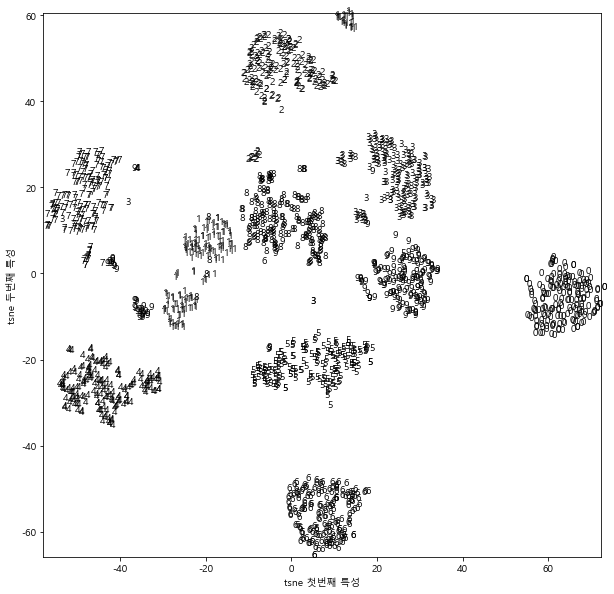

In [150]:
# t-sne 모델을 사용해 시각화 해보기
from sklearn.manifold import TSNE

# 모델 생성 및 학습,변환
tsne = TSNE(random_state=42)
digit_tsne = tsne.fit_transform(digit.data)

# 시각화 하기
plt.figure(figsize = (10,10))
plt.xlim(digit_tsne[:,0].min(),digit_tsne[:,0].max()) # x축의 범위 지정
plt.ylim(digit_tsne[:,1].min(),digit_tsne[:,1].max()) # y축의 범위 지정

# digit.data의 개수만큼 반복하면서 산점도 그리기
for i in range(len(digit.data)):
    plt.text(digit_tsne[i,0],digit_tsne[i,1], str(digit.target[i]),fontdict={'size' : 10})

plt.xlabel('tsne 첫번째 특성')
plt.ylabel('tsne 두번째 특성')
plt.show()

#############################
# pca와 비교해봤을 때 훨씬 더 잘 분류된 시각화 그림을 보여주는 것을 확인할 수 있다.

# 군집 분석

* 데이터의 집합으르 cluster라는 그룹으로 분할

# K-means

* 군집분석 방법 중 하나이다.
* 임의의 데이터 포인트를 뽑아서 초기치로 지정한다.
* 각 데이터 포인트로부터 거리를 구해 클러스터로 할당한 후 클러스터의 중심을 다시 구한다.
* 위의 과정을 중심이 변하지 않을때까지 반복한다.

* k-means의 파라미터
* n_clusters -> 초기치의 데이터 포인트 지정
* init = 'k-means++' -> 초기치를 설정할때 각 포인트들이 서로 멀리 떨어져 있으라는 의미
* n_init -> 클러스터의 초기치의 반복 횟수

Text(0.5, 1.0, '예측 데이터 시각화')

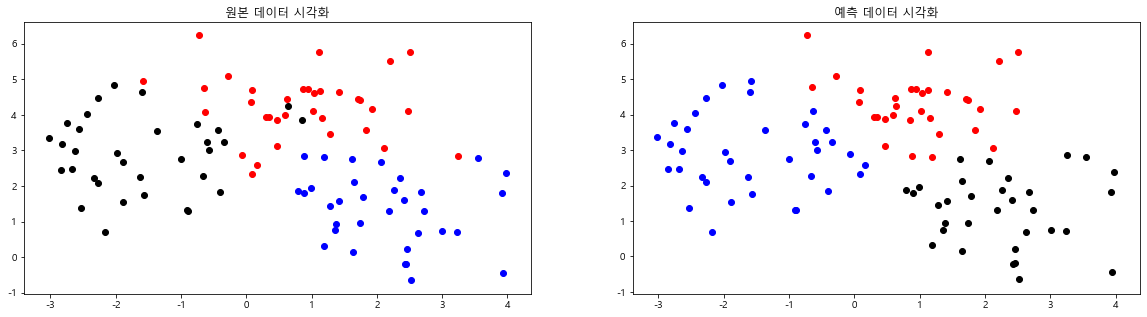

In [192]:
# make_blobs 데이터에서 kmeans 모델 적용해보기
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# 데이터 생성하기
X,y = make_blobs(random_state=0)

# kmeans 모델 생성 및 학습 -> 초기치를 3개로 잡는다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# 예측하기
pred = kmeans.predict(X)

# 그래프 시각화 해보기

# 각 클러스터마다의 인덱스 추출
mask1 = (y==0)
mask2 = (y==1)
mask3 = (y==2)

mask_pred1 = (pred == 0)
mask_pred2 = (pred == 1)
mask_pred3 = (pred == 2)

# 위에서 구한 인덱스를 데이터 X에 적용
group1 = X[mask1]
group2 = X[mask2]
group3 = X[mask3]

group_pred1 = X[mask_pred1]
group_pred2 = X[mask_pred2]
group_pred3 = X[mask_pred3]

# 원본 데이터 시각화 하기
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.scatter(group1[:,0],group1[:,1],marker='o',color='r')
plt.scatter(group2[:,0],group2[:,1],marker='o',color='b')
plt.scatter(group3[:,0],group3[:,1],marker='o',color='black')
plt.title('원본 데이터 시각화')

# 예측 데이터 시각화 하기
plt.subplot(122)
plt.scatter(group_pred1[:,0],group_pred1[:,1],marker='o',color='r')
plt.scatter(group_pred2[:,0],group_pred2[:,1],marker='o',color='b')
plt.scatter(group_pred3[:,0],group_pred3[:,1],marker='o',color='black')
plt.title('예측 데이터 시각화')


##############################
# 예측값을 출력하면 레이블 값이 나오지만, 그 레이블들이 어떤 의미를 가지고 있지는 않다.
# 원본 데이터와 비교해보았을 때 서로의 집단을 어느정도 잘 구분하고 있는것을 확인할 수 있다.

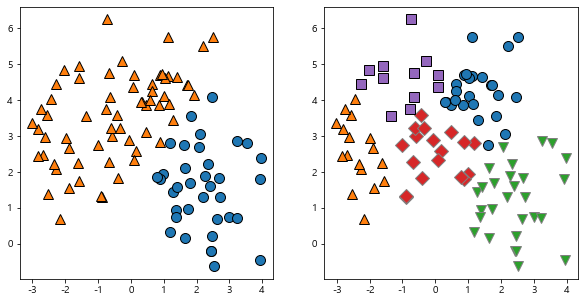

In [193]:
# 클러스터의 개수를 조절해보기

# 모델 생성 및 학습
kmeans = KMeans(n_clusters=2) # 2개의 클러스터 사용
kmeans.fit(X)
assignments = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 그래프 크기 설정

# cluster가 2개일때 시각화 하기
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 모델 생성 및 학습
kmeans = KMeans(n_clusters=5) # 5개의 클러스터 사용
kmeans.fit(X)
assignments = kmeans.labels_

# cluster가 5개 일때 시각화 하기
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show() 

#######################3
# kmeans는 군집의 개수만 사람이 임의로 정해주고 학습하는 과정은 비지도 학습을 통해 이루어진 것이기 때문에
# 우리는 결과를 보고 무엇을 의미하는지 해석하는 것이 중요하다.
# subplots에서 서브플롯을 지정해주고 plt 안에서 ax옵션을 통해 위치를 지정 가능하다.

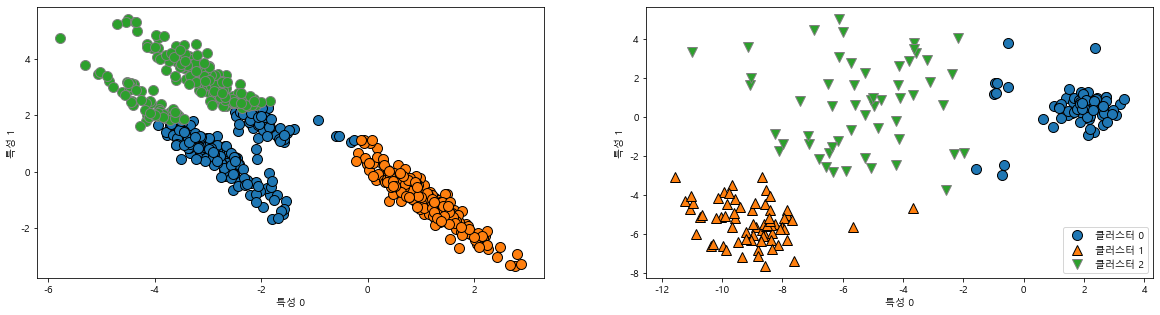

In [220]:
# kmeans 모델이 잘 적용이 되지 않을 때

# 무작위 데이터 생성
X,y = make_blobs(random_state=170, n_samples= 600)
rng = np.random.RandomState(74) # 시드값을 정해주는 객체를 생성

# 데이터 변경
transform = rng.normal(size=(2,2)) # 2*2 행렬로 난수 발생
X = np.dot(X,transform) # X데이터에 transform 데이터를 서로 내적한다.

# 모델 생성 및 학습시키기
kmeans = KMeans(n_clusters=3) # 초기 클러스터 3개 지정
kmeans.fit(X)

# 예측하기
y_pred = kmeans.predict(X)

# 그래프 설정
fig, axes = plt.subplots(1,2,figsize = (20,5))

# 첫번째 모델 시각화 
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o',ax = axes[0])
axes[0].set_xlabel("특성 0")
axes[0].set_ylabel("특성 1")



# 두번째 데이터 생성
X_varied, y_varied = make_blobs(n_samples=200,cluster_std=[1.0, 2.5, 0.5],random_state=170)

# 앞의 모델을 사용하여 예측하기
y_pred1 = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

# 두번째 모델 시각화
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred1,ax = axes[1])
axes[1].legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
axes[1].set_xlabel("특성 0")
axes[1].set_ylabel("특성 1")

plt.show()

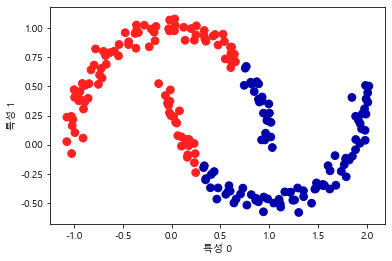

In [222]:
# 세번째 데이터 생성
X,y = make_moons(n_samples=200, noise=0.05, random_state= 0 )

# 초기 클러스터를 2개로 하는 새로운 모델 생성 및 학습
kmeans1 = KMeans(n_clusters= 2)
kmeans1.fit(X)

# 예측하기
y_pred2 = kmeans1.predict(X)

# 세번째 모델 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_pred2, cmap=mglearn.cm2, s=60)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

################################
# 위에서 만든 3개의 kmeans모델을 적용한 시각화 모형을 보면, 원하는 군집대로 잘 구분하지 못하고 있는 것을 확인할 수 있다.

# kmeans 장점
# 구현이 쉽다.
# 대규모 데이터에 적용이 가능하다.

# kmeans의 단점
# 방향을 고려하지 않고, 거리만을 구한다.
# 반경이 동일하다고 가정한다. 
# 둥근 클러스터에만 잘 적용된다.
# 초기값의 설정에 따라 결과가 달라진다.

# 병합 군집

* 시작할 때 각 포인트를 하나의 클러스터로 지정한다.
* 종료조건을 만족할 때까지 가장 비슷한 클러스터를 합쳐나간다.
* 보통은 지정된 클러스터 개수가 될때까지 계속 알고리즘을 진행한다.
* 비슷한 클러스터를 측정하는 방법은 ward, average , complete 방법이 있다.

* ward -> 모든 클러스터 내의 분산을 가장 작게 증가시키는 클러스터를 합친다. (default값)
* average -> 포인트 사이의 평균 거리가 가장 짧은 클러스터를 합친다.
* complete -> 포인트 사이의 최대 거리가 가장 짧은 클러스터를 합친다.

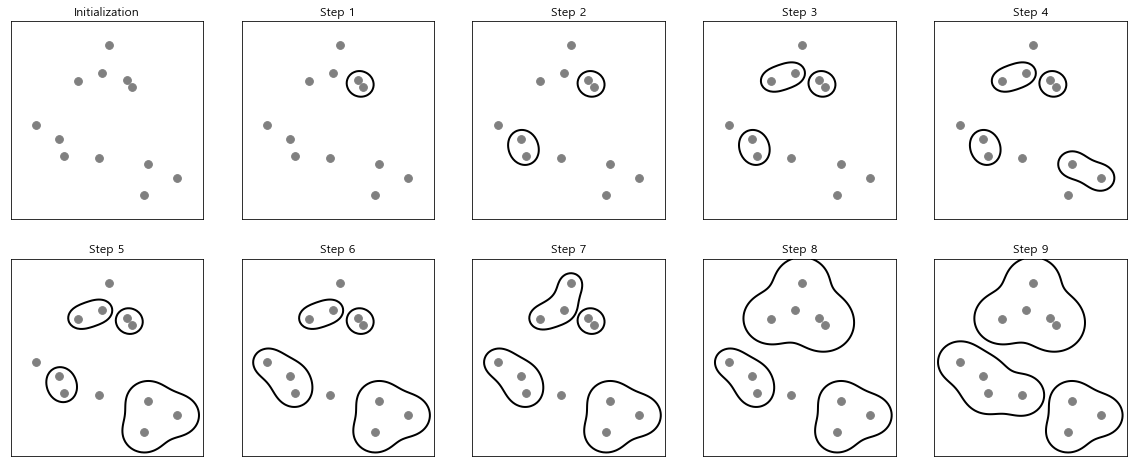

In [224]:
# 병합군집이 이루어지는 단계 알아보기 -> mglearn에 저장되어 있는 그림 시각화

mglearn.plots.plot_agglomerative_algorithm()

#######################
# 시각화된 과정을 통해 각 포인터가 하나의 클러스터로 할당되고 비슷한 클러스터를 측정해 서로 병합하는 과정을 확인 할 수 있다.

* 주의해야 할 점
* 병합 군집은 새로운 데이터 포인터에 대해서는 예측을 할수가 없다.
* 즉, predict 메소드가 없고, 훈련데이터에 관한 클러스터 정보를 얻기 위해서는 fit_predict 메소드를 사용한다.

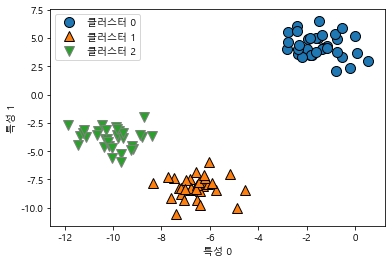

In [229]:
# make_blobs 데이터에 병합군집 사용해보기
from sklearn.cluster import AgglomerativeClustering

# 데이터 생성
X, y = make_blobs(random_state=1)

# 모델 생성 및 학습
agg = AgglomerativeClustering(n_clusters=3) # 클러스터가 3개가 될때까지 병합을 반복한다.
assignment = agg.fit_predict(X) # 병합된 클러스터의 정보를 출력한다.

# 시각화 하기
mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.legend(['클러스터 0','클러스터 1','클러스터 2'],loc='best') # 범례 지정
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

#################################
# 시각화된 정보를 확인해 보면 병합군집 알고리즘은 각 포인터들의 클러스터를 잘 찾았다는 것을 확인할 수 있다.
# 병합군집은 하나의 데이터 포인터에서 클러스터를 형성해 하나씩 클러스터를 합쳐나가는 방식이기 때문에 적절한 클러스터 개수를 설정하는데
# 도움을 주기도 한다.

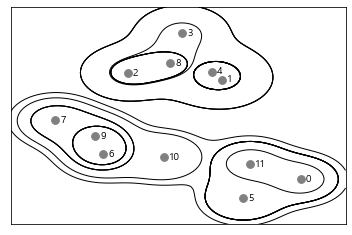

In [230]:
# 병합군집이 만들어지기 까지의 클러스터 병합 과정 시각화
mglearn.plots.plot_agglomerative()

###########################
# 시각화된 정보를 통해 클러스터가 3개정도로 정해졌을때 군집을 잘 찾았다고 판단을 내릴 수 있다.
# 단, 이런 시각화 정보는 2차원에 데이터에만 가능하며 다차원 데이터로 넘어가게 되면, 덴드로그램을 이용해 클러스터 개수를 지정할 수 있다.
# 덴드로그램은 sklearn에서는 지원하지 않고, scipy에서 지원한다.

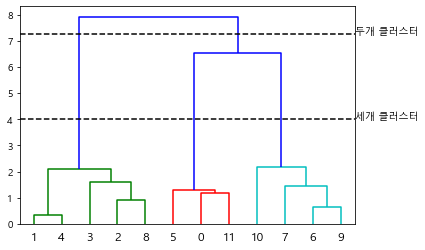

In [249]:
# ward와 덴드로그램 함수 불러오기
from scipy.cluster.hierarchy import dendrogram, ward

# 데이터 생성
X, y = make_blobs(random_state=0, n_samples= 12)

# X에 ward함수 적용하기 -> 거리정보가 담긴 배열을 반환한다.
linkage = ward(X)

# 덴드로그램 그리기
dendrogram(linkage)

# 좀 더 간단히 시각화하기
ax = plt.gca() # 이전 그림이 없으면 생성, 그림이 있으면 현재 그림에다가 축 생성
bounds = ax.get_xbound()

ax.plot(bounds,[7.25,7.25],'--',c='k') # 7.25에서 선을 긋는다.
ax.plot(bounds,[4,4],'--',c='k') # 4에서 선을 긋는다.

ax.text(bounds[1],7.25,'두개 클러스터')
ax.text(bounds[1],4,'세개 클러스터')
plt.show()

###########################
# 덴드로그램을 통해 클러스터를 몇개로 설정해야 군집을 잘 얻을 수 있는지 판단할 수 있다.
# 가지의 길이는 클러스터가 얼마나 멀리 떨어져 있는지를 보여준다.
# 병합군집은 two_moon와 같은 데이터에는 잘 맞지 않는다.

# DBSCAN

* dbscan은 클러스터의 개수를 미리 정할 필요가 없다.
* kmeans와 군집병합보다는 속도가 느리다.
* 밀도기반 모델이다.
* 무작위로 처음 포인트를 설정한다. -> eps와 minpoints의 개수를 설정한다.
* 포인터에서 eps의 반경안에 minpoints개수만큼의 포인트들이 존재하면 그 반경안에 있는 포인트들을 하나의 클러스터로 간주한다.
* core 포인트는 가지고 있지만, minpoints의 개수를 충족하지 못한 포인트를 border포인트라고 한다.
* core포인트도 가지고 있지 않고, minpoints의 개수도 충족하지 못한 포인트를 noise포인트라고 한다.
* dbscan도 새로운 데이터에 대해서는 예측할 수 없다. -> fit_predict 메소드를 사용한다.

In [252]:
# dbscan 모델 적용해보기
from sklearn.cluster import DBSCAN

# 데이터 생성
X,y = make_blobs(random_state=0, n_samples=12)

# 모델 생성 및 학습
dbscan = DBSCAN()
cluster = dbscan.fit_predict(X)

print(cluster)
print('default 파라미터 : \n',dbscan)

#################
# dbscan의 eps와 min_sample의 default값은 0.5 와 5 이다.
# 두 파라미터의 설정이 좋지 않기 때문에 결과가 -1로 전부 noise포인트로 할당되었다.
# 이 문제를 해결하기 위해선 eps와 min_sample을 변경시켜 주어야 한다.

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
default 파라미터 : 
 DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


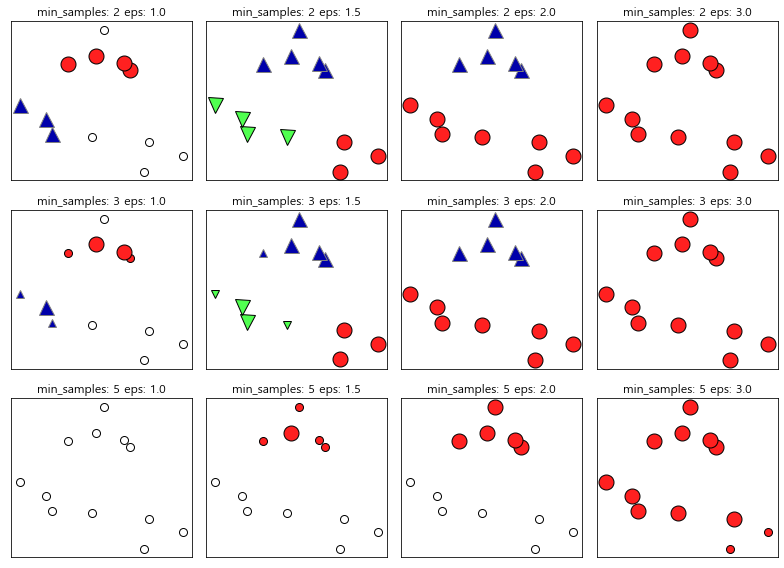

In [280]:
# eps와 min_sample을 바꿔가면서 군집 확인해보기
mglearn.plots.plot_dbscan()

########################
# 시각화된 정보를 확인해 보았을 때, min_samples =2 ,eps = 1.5 일때와 min_samples = 3 , eps = 1.5일때의 군집 설정이 가장 잘 된것 같다.
# 적절한 eps를 쉽게 찾기 위해서는 특성의 스케일을 standard scaler나 minmax scaler를 이용해 변경시키는 방법도 있다.

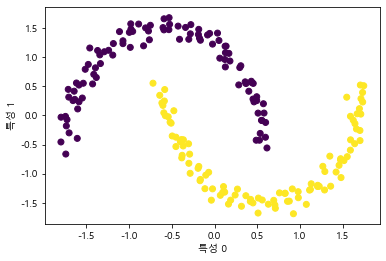

In [282]:
# moon data에 dbscan 적용해보기

# 데이터 생성
X, y = make_moons(n_samples=200, noise= 0.05, random_state= 0 )

# standatd scaler를 이용해 스케일링 하기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# 모델 생성 및 학습, 변환
dbscan = DBSCAN()
cluster = dbscan.fit_predict(X_scaled)

# 시각화 해보기
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=cluster)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

#######################################
# dbscan을 이용했을 때는 원하는 군집으로 나뉘어진 것을 확인할 수 있다.
# kmeans나 군집병합을 이용했을 때는 밑의 그림처럼 완벽히 나뉘어지지 않았었다.

# plt.scatter 함수 안에 c = cluster를 넣어 cluster의 군집에 맞게 색깔을 나눌 수 있다.

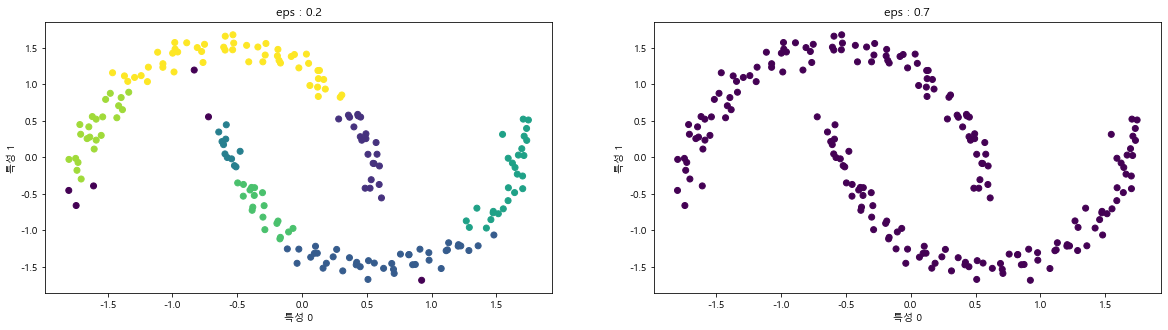

In [285]:
# eps 가 0.2와 0.7일때 시각화해보기
dbscan = DBSCAN(eps=0.2)
dbscan1 = DBSCAN(eps=0.7)
cluster = dbscan.fit_predict(X_scaled)
cluster1 = dbscan1.fit_predict(X_scaled)

# 시각화 해보기
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].scatter(X_scaled[:,0],X_scaled[:,1],c=cluster)
ax[0].set_xlabel('특성 0')
ax[0].set_ylabel('특성 1')
ax[0].set_title('eps : 0.2')

ax[1].scatter(X_scaled[:,0],X_scaled[:,1],c=cluster1)
ax[1].set_xlabel('특성 0')
ax[1].set_ylabel('특성 1')
ax[1].set_title('eps : 0.7')

plt.show()

###############################
# eps가 너무 작으면 반달 모양을 잘 구분하지 못하고 eps가 너무 크면 전체를 하나의 클러스터로 구분해버리는 문제점이 발생한다.
# eps값의 적절한 조절이 필요하다는 것을 알 수 있다.

# 군집평가

* 군집이 얼마나 잘 형성되었는지에 대한 평가를 실시한다.
* 군집간 분산은 최대화하고, 군집내 분산은 최소화 시키는지 평가한다.

* 타깃값이 있는 경우
* 군집 알고리즘의 결과를 실제 정답 클러스터와 비교하여 평가한다.
* RI(Rand index) , ARI(adjust rand index) , NMI(normarlized mutual information) 지표들이 존재한다.

* 타깃값이 없는 경우
* 실루엣 계수를 사용한다.
* 실루엣 점수는 클러스터의 밀집 정도를 계산한다. -> 높을수록 좋으며 최대 점수는 1이다.
* 하지만, 실루엣 점수는 모양이 복잡할 때는 평가가 잘 들어맞이 않을 수도 있다.

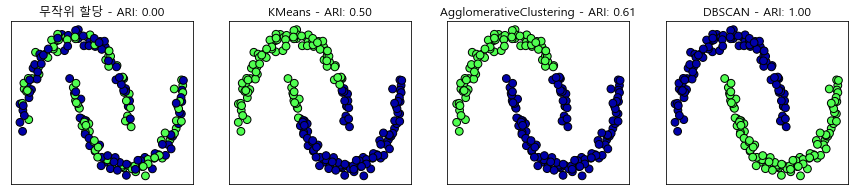

In [286]:
# moon 데이터를 이용해 ARI로 평가하기
from sklearn.metrics.cluster import adjusted_rand_score

# 데이터 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1로 standard scaler 스케일링 해주기
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 모델 리스트로 만들기
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

# 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0) # 시드값 지정 객체 생성
random_clusters = random_state.randint(low=0, high=2, size=len(X)) # 0~2사이에서 X의 개수만큼 난수 발생

# 무작위 클러스터 시각화
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

# 모델별 클러스터 시각화
for ax, algorithm in zip(axes[1:], algorithms):
    
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y, clusters)))

##########################3
# 시각화된 정보를 해석해보면 dbscan 모델을 사용했을 때 ARI가 1로 가장 높은 점수를 낸 것을 확인할 수 있고, 반달을 제대로 구분한 것을 
# 확인할 수 있다.

# 군집 평가를 할때에는 정확도를 가지고 평가를 하면 안된다. 
# 클러스터의 레이블값은 의미가 있는 것이 아니기 때문에 정확도를 가지고 하면 실행시킬때마다 정확도가 달라질 수 있다.

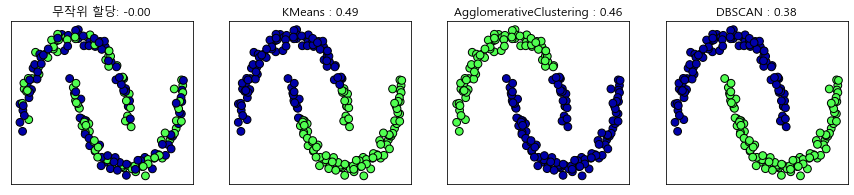

In [287]:
# 실루엣 점수를 사용해 MOON 데이터 평가하기
from sklearn.metrics.cluster import silhouette_score

# 데이터 생성
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1로 standard scaler 스케일링 해주기
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 모델 리스트로 만들기
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

# 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0) # 시드값 지정 객체 생성
random_clusters = random_state.randint(low=0, high=2, size=len(X)) # 0~2사이에서 X의 개수만큼 난수 발생


# 무작위 클러스터 시각화
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

# 모델별 클러스터 시각화
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,silhouette_score(X_scaled, clusters)))
    
##################################
# 실루엣 점수는 높을수록 좋은것이라고 했는데, DBSCAN의 경우 군집이 잘 형성되었지만, 실루엣 점수는 낮은것을 확인할 수 있다.

# 얼굴 사진을 이용해 앞에서 시행했던 군집모델 사용해보기

* DBSCAN 사용하기

In [288]:
# LFW 데이터를 PCA를 사용해 차원축소 시킨다.
from sklearn.decomposition import PCA

# 특성을 100개로 줄인다.
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [295]:
# eps를 15 , min_samples를 3으로 설정한다.

# 모델 학습
dbscan = DBSCAN(min_samples=3, eps=15)

# 군집 정보 저장
labels = dbscan.fit_predict(X_pca)
print('클러스터 값 : ',np.unique(labels))

# 각 클러스터의 개수 파악
print('클러스터 개수 : ',np.bincount(labels+1))

################################
# np.unique를 통해 노이즈와 코어 포인트가 있는것을 확인할 수 있다.
# np.bincount를 통해 노이즈 포인트가 32개가 있다는 것을 확인할 수 있다.

클러스터 값 :  [-1  0]
클러스터 개수 :  [  32 2031]


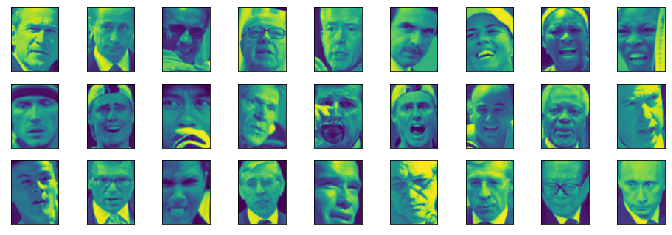

In [296]:
# 노이즈 포인트 확인해보기
noise = X_people[labels==-1]

# 시각화 하기
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

* kmeans 사용하기

In [298]:
# 클러스터 개수를 10개로 지정한다.
n_clusters = 10

# kmeans 모델 적용 및 학습
km = KMeans(n_clusters=n_clusters, random_state=0)

# 클러스터 정보 추출
labels_km = km.fit_predict(X_pca)

# 각 클러스터 개수 확인하기
print("kmeans 클러스터 크기:", np.bincount(labels_km))

kmeans 클러스터 크기: [155 175 238  75 358 257  91 219 323 172]


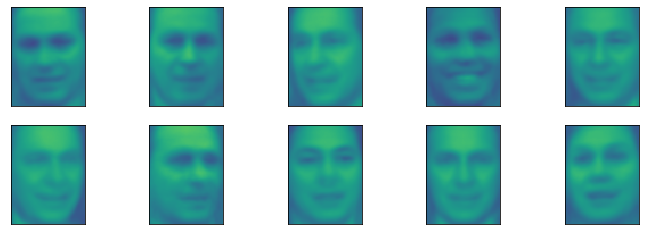

In [299]:
# kmeans가 찾은 중심 10개를 다시 차원을 원상복구 시켜 시각화한다.
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},figsize=(12, 4))


for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),vmin=0, vmax=1) # 차원을 복구시키고 reshape를 해준다.

###############################
# 각 클러스터의 중심을 살펴보면 각도와 웃는 모습을 중심으로 설정한것 같다.

* 병합군집 사용하기

In [300]:
# 병합 군집으로 클러스터를 추출

# 클러스터가 10개가 될때까지 병합 반복
agglomerative = AgglomerativeClustering(n_clusters=10)

# 클러스터의 정보 추출
labels_agg = agglomerative.fit_predict(X_pca)

# 각각의 클러스터의 개수 출력
print("병합 군집의 클러스터 개수:",np.bincount(labels_agg))

병합 군집의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]


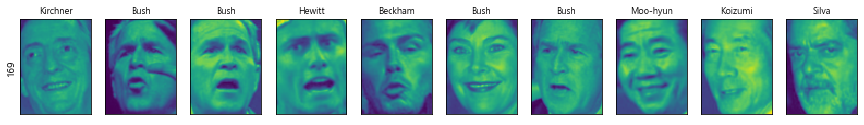

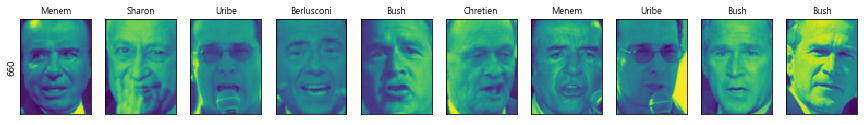

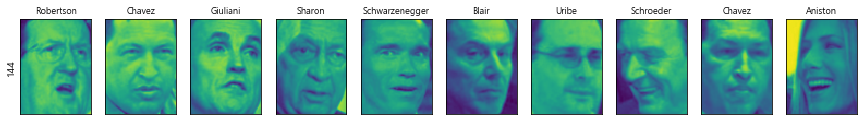

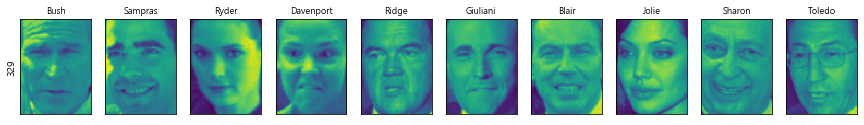

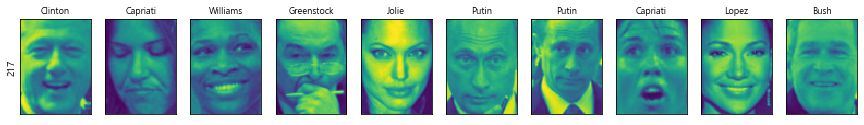

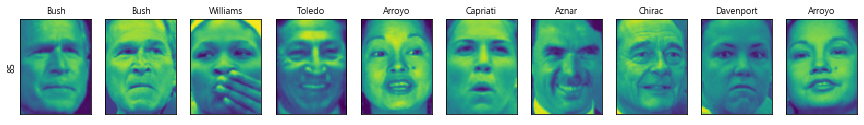

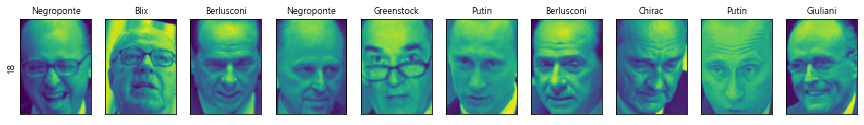

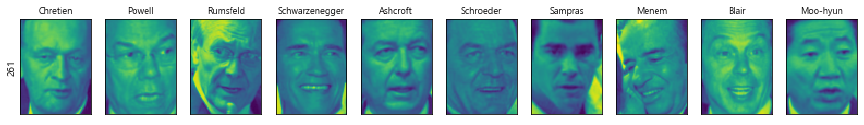

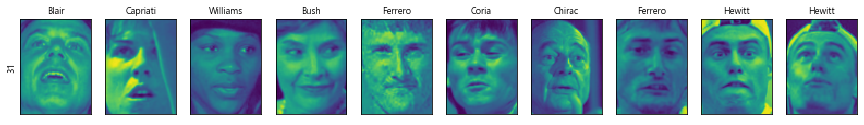

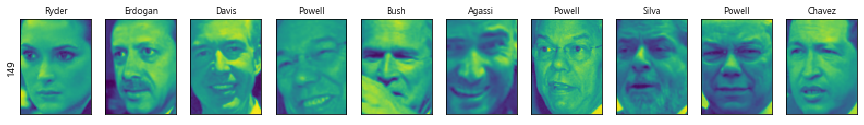

In [302]:
# 병합 군집 시각화하기
n_clusters = 10

for cluster in range(n_clusters):
    mask = (labels_agg == cluster) # 인덱스 지정
    # 그래프 설정
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask)) # y축 이름 설정
    
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1) # 사진의 픽셀로 변경해서 이미지 시각화
        ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize': 9})

###########################
# 시각화된 정보를 확인해보니 각 클러스터가 각 이미지를 잘 구분하고 있지 못한것을 확인할 수 있다.

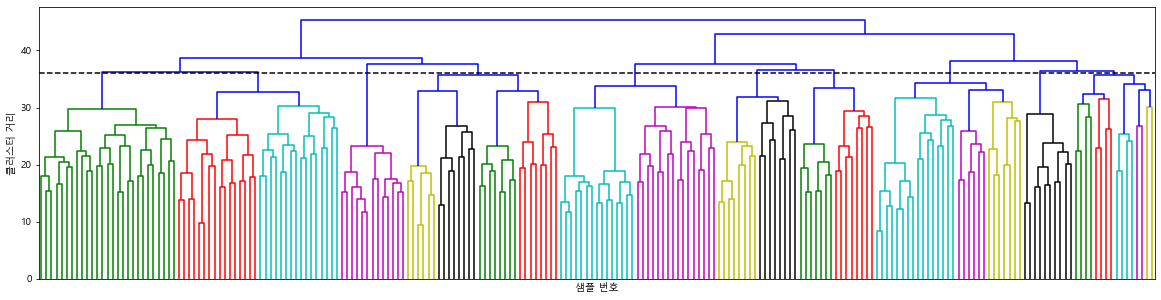

In [303]:
# 적절한 클러스터 개수를 지정하기 위해 덴드로그램 그려보기

linkage_array = ward(X_pca) # ward 이용

plt.figure(figsize=(20, 5)) # 그래프 설정
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)  # 덴드로그램 그리기
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax = plt.gca() # 원래 있는 이미지에서 축 생성
bounds = ax.get_xbound() # 선 긋기
ax.plot(bounds, [36, 36], '--', c='k') # 36에서 선 긋기

##################################
# 덴드로그램을 확인해 보았을 때 34 정도나 37정도에서 클러스터를 구분했을때 결과가 좋을것으로 확인이 된다.

In [306]:
# ARI 평가를 사용해 각 모델의 점수 비교해보기
print('ARI(군집병합과 kmeans) : {:.3f}'.format(adjusted_rand_score(labels_agg,labels_km)))
print('ARI(dbscan과 kmeans) : {:.3f}'.format(adjusted_rand_score(labels,labels_km)))
print('ARI(dbscan과 군집병합) : {:.3f}'.format(adjusted_rand_score(labels,labels_agg)))

#########################
# 결과를 통해 각 모델별로 공통 부분이 거의 없다는 사실을 알 수 있다.

ARI(군집병합과 kmeans) : 0.087
ARI(dbscan과 kmeans) : 0.001
ARI(dbscan과 군집병합) : 0.006
